In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("C:\\Users\\BISHAL\\Desktop\\Project\\Machine Learning project Time Forecasting\\Monthly.csv")
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [3]:
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [4]:
df.shape

(847, 2)

In [5]:
print(f"Date range of gold price available from- {df.loc[:,'Date'][0]} to {df.loc[:,'Date'][len(df)-1]}")

Date range of gold price available from- 1950-01 to 2020-07


In [6]:
date = pd.date_range(start = '1/1/1950', end='8/1/2020',freq='M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')

In [7]:
df['month']=date
df.drop('Date',axis =1, inplace= True)
df = df.set_index('month')
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


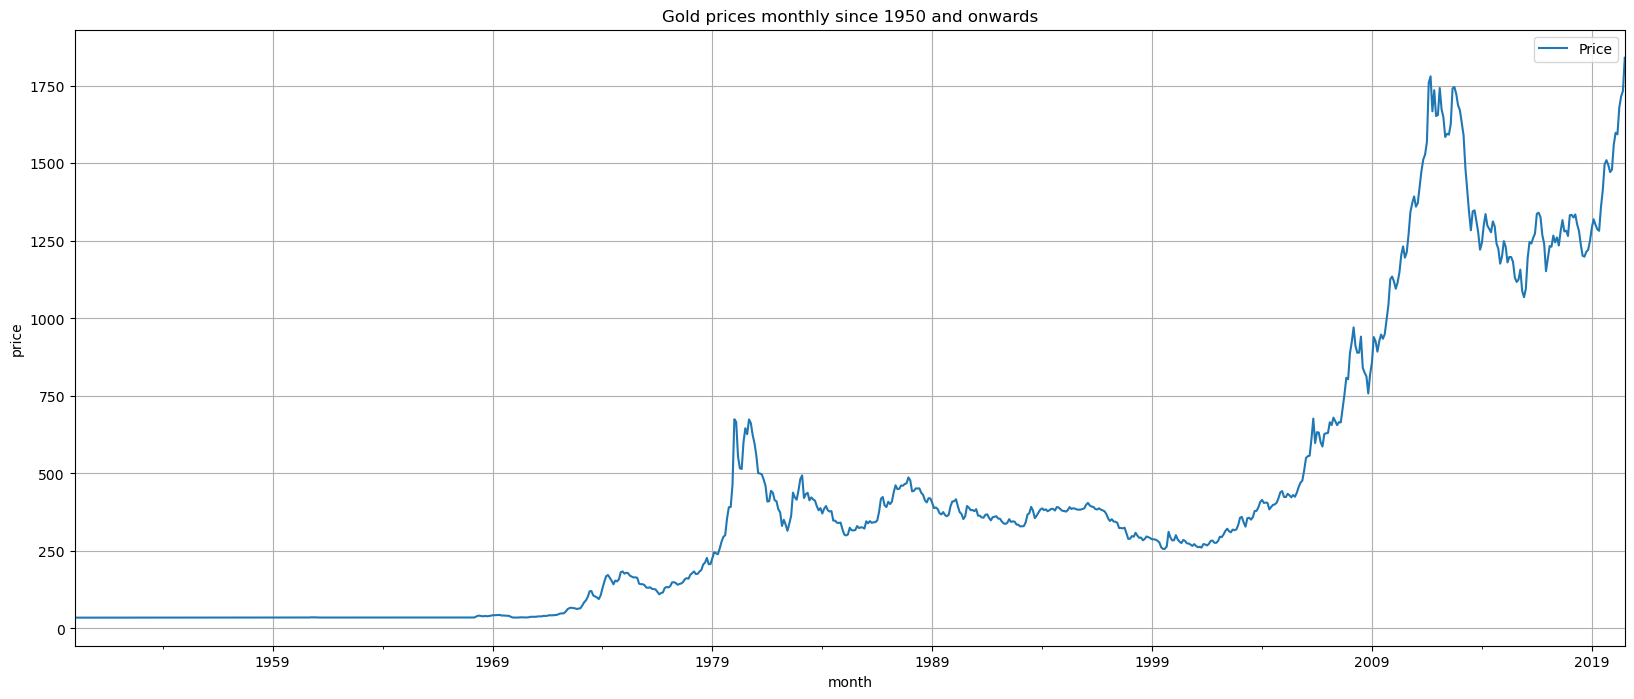

In [8]:
df.plot(figsize=(20,8))
plt.title("Gold prices monthly since 1950 and onwards")
plt.xlabel("month")
plt.ylabel('price')
plt.grid()

In [12]:
round(df.describe(),3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


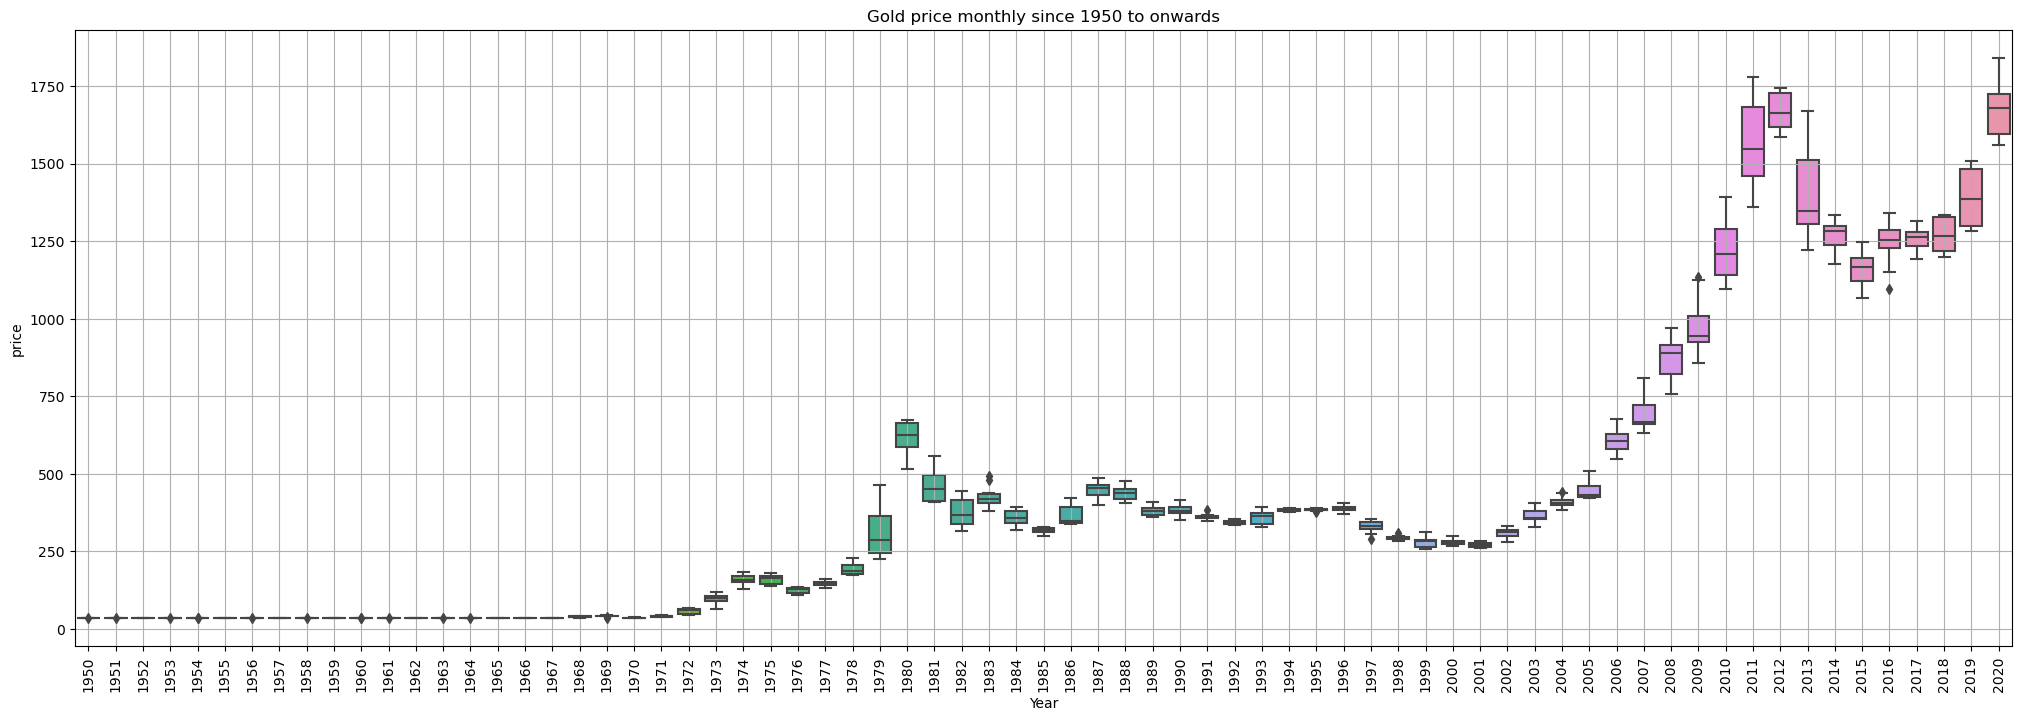

In [34]:
_, ax = plt.subplots(figsize=(25,8))
sns.boxplot(x = df.index.year, y = df.values[:,0], ax=ax)
plt.title('Gold price monthly since 1950 to onwards')
plt.xlabel("Year")
plt.ylabel('price')
plt.xticks(rotation = 90)
plt.grid()

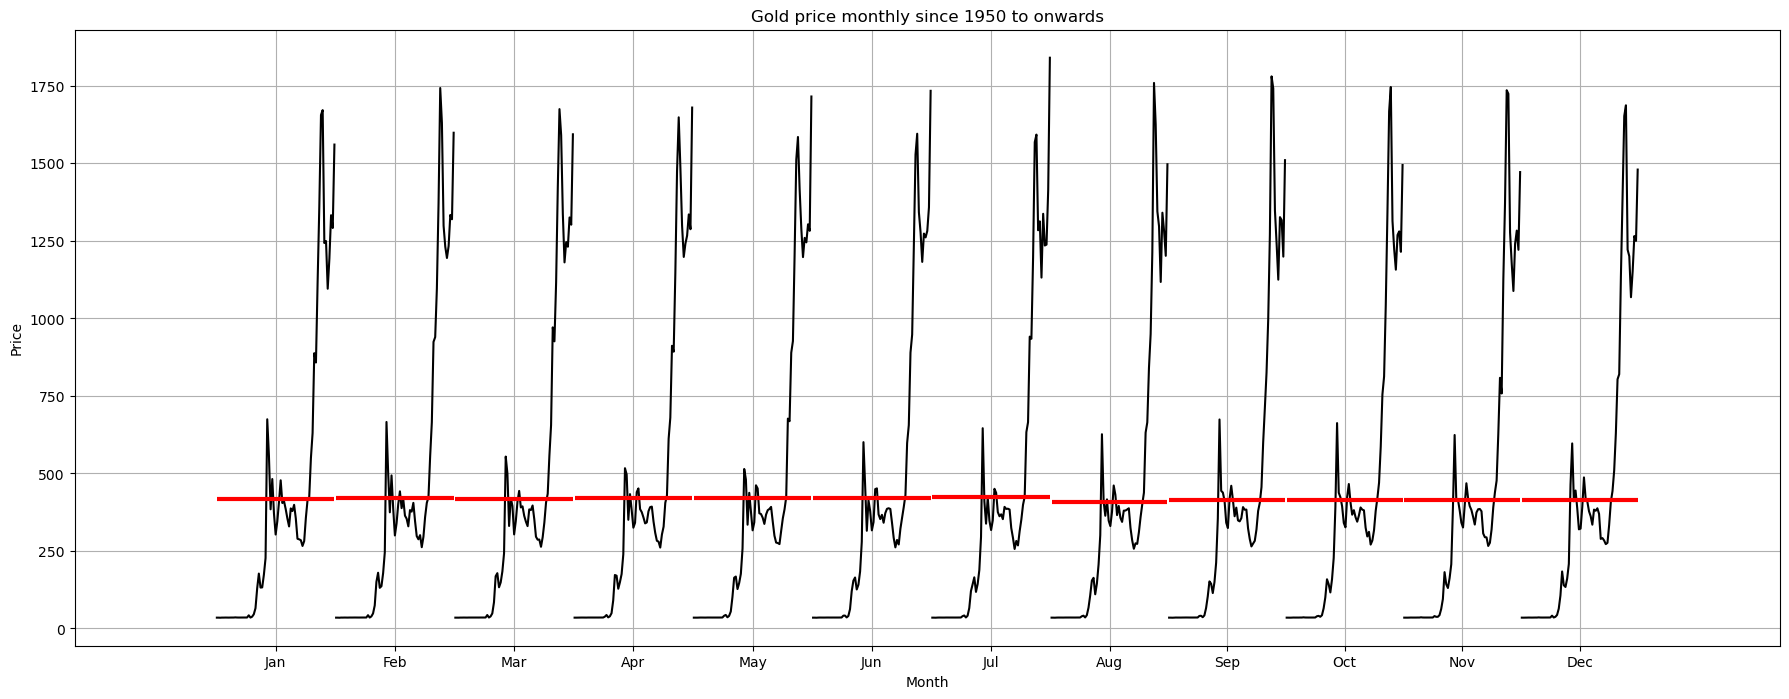

In [32]:
from statsmodels.graphics.tsaplots import month_plot
fig, ax = plt.subplots(figsize=(22,8))
month_plot(df,ylabel =' gold price', ax = ax)
plt.title('Gold price monthly since 1950 to onwards')
plt.xlabel("Month")
plt.ylabel('Price')
plt.grid()

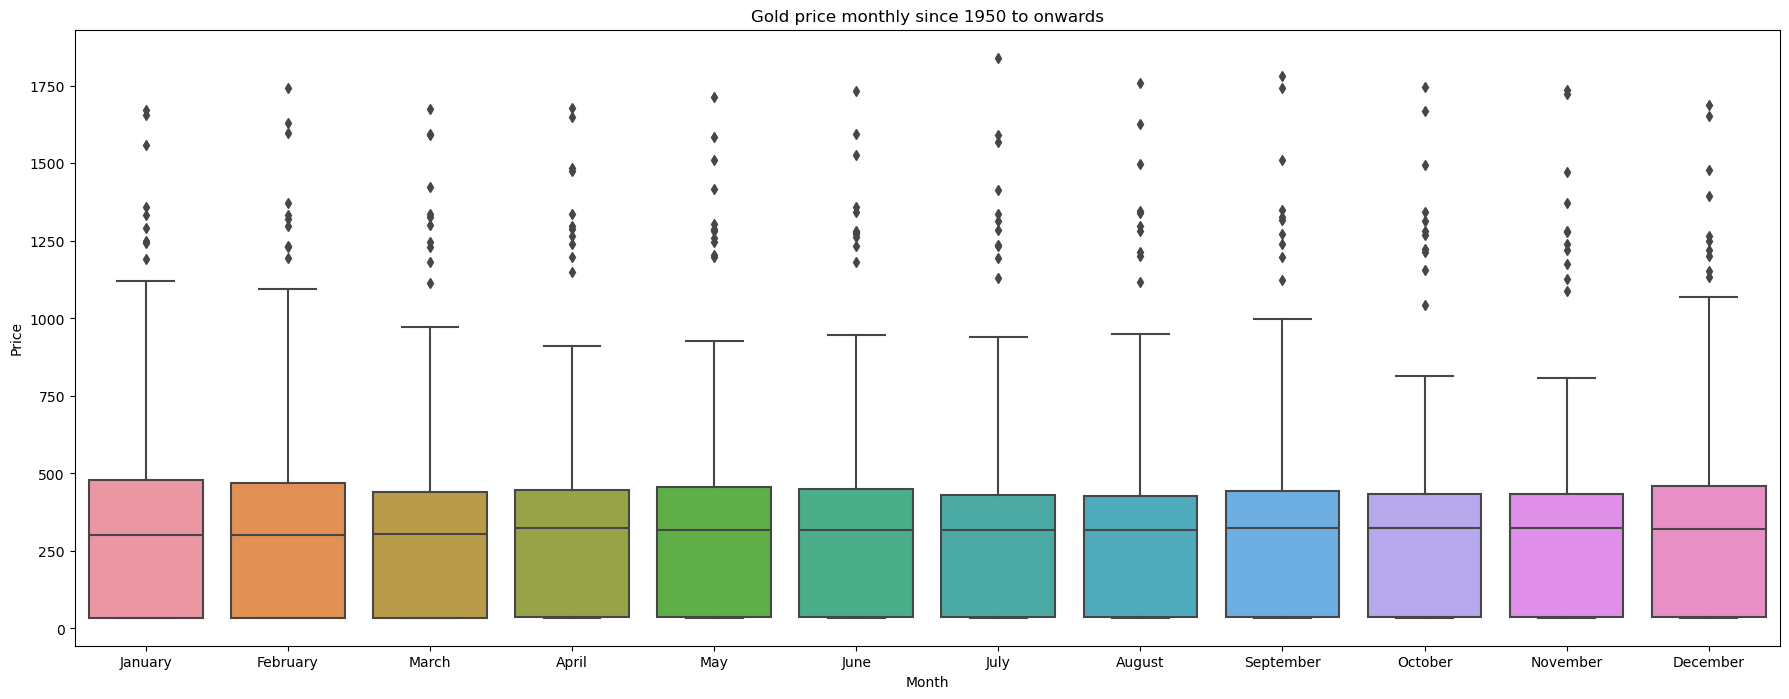

In [29]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x=df.index.month_name(), y= df.values[:, 0],ax = ax)
plt.title('Gold price monthly since 1950 to onwards')
plt.xlabel("Month")
plt.ylabel('Price')
plt.show()

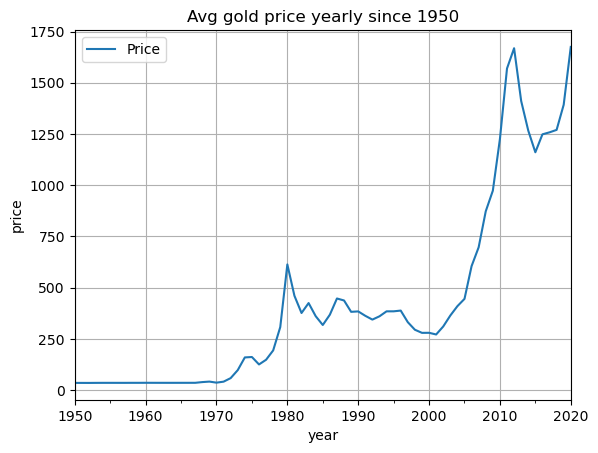

In [10]:
df_yearly_sum = df.resample('A').mean()
df_yearly_sum.plot();
plt.title('Avg gold price yearly since 1950')
plt.xlabel('year')
plt.ylabel('price')
plt.grid()

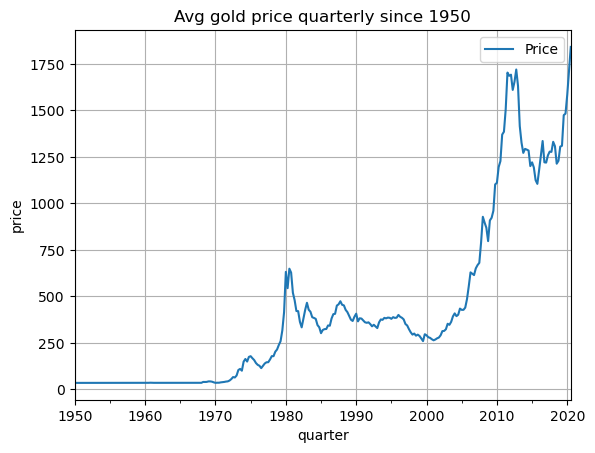

In [13]:
df_quarterly_sum = df.resample('Q').mean()
df_quarterly_sum.plot();
plt.title('Avg gold price quarterly since 1950')
plt.xlabel('quarter')
plt.ylabel('price')
plt.grid()

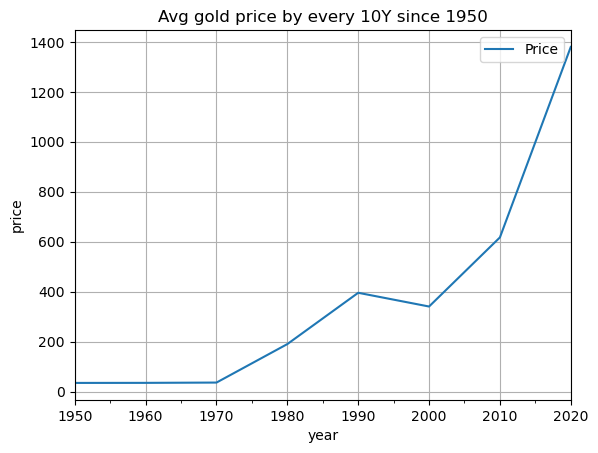

In [14]:
df_decade_sum = df.resample('10Y').mean()
df_decade_sum.plot();
plt.title('Avg gold price by every 10Y since 1950')
plt.xlabel('year')
plt.ylabel('price')
plt.grid()

In [17]:
train = df[df.index.year <=2015]
test = df[df.index.year > 2015]


In [18]:
print(train.shape)
print(test.shape)


(792, 1)
(55, 1)


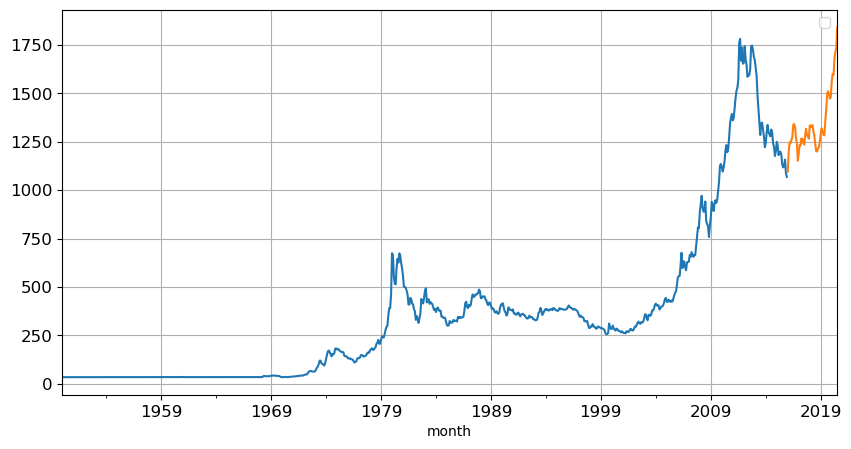

In [24]:
train["Price"].plot(figsize=(10,5), fontsize = 12)
test["Price"].plot(figsize=(10,5), fontsize = 12)
plt.grid()
plt.legend ('Training data','Test data')
plt.show()

In [25]:
train_time = [i+1 for i in range (len(train))]
test_time = [i+len(train)+1 for i in range (len(test))]
len(train_time), len(test_time)

(792, 55)

In [27]:
LR_train = train.copy()
LR_test = test.copy()

In [29]:
LR_train['time'] = train_time
LR_test ['time'] = test_time

In [34]:
lr = LinearRegression()
lr.fit(LR_train[['time']], LR_train['Price'].values)


LinearRegression()

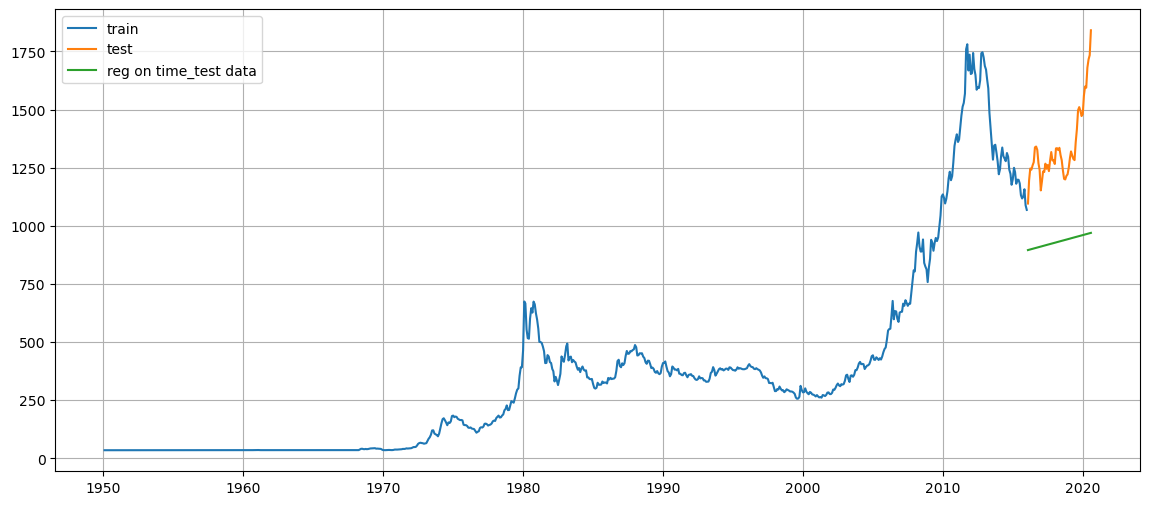

In [42]:
test_prediction_model1 = lr.predict (LR_test[['time']])
LR_test['forecast'] = test_prediction_model1

plt.figure(figsize =(14, 6))
plt.plot(train['Price'], label = 'train')
plt.plot(test['Price'], label = 'test')
plt.plot(LR_test['forecast'], label = 'reg on time_test data')
plt.legend(loc = 'best')
plt.grid()


In [45]:
def mape (actual, pred):
    return round ((np.mean(abs(actual-pred)/actual))*100, 2)

    

In [48]:
mape_model1_test = mape(test['Price'].values, test_prediction_model1)
print("MAPE is %3.3f"%(mape_model1_test), "%")

MAPE is 29.760 %


In [49]:
naive_train = train.copy()
naive_test = test.copy()

In [51]:
naive_test['naive'] = np.asarray(train['Price'])[len(np.asarray(train['Price']))-1]
naive_test['naive'].head()

month
2016-01-31    1068.317
2016-02-29    1068.317
2016-03-31    1068.317
2016-04-30    1068.317
2016-05-31    1068.317
Name: naive, dtype: float64

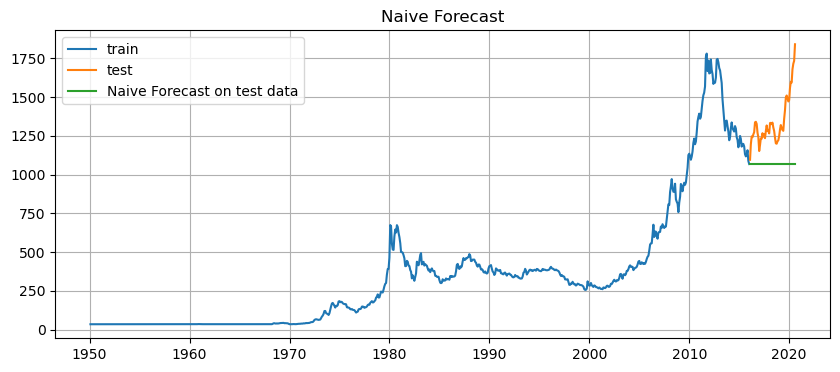

In [58]:
plt.figure(figsize = (10,4))
plt.plot(naive_train['Price'], label = 'train')
plt.plot(test['Price'], label = 'test')
plt.plot(naive_test['naive'], label = 'Naive Forecast on test data')
plt.legend(loc = 'best')
plt.title('Naive Forecast')
plt.grid()

In [70]:
Final_Model = ExponentialSmoothing(df,
                                   trend ='additive', 
                                   seasonal= 'additive').fit(smoothing_level = 0.4,
                                                           smoothing_trend = 0.3,
                                                           smoothing_seasonal= 0.6)